# City Bikeshare System

**Hypothesis:**
- Registered users will more likely rent more bikes on weekdays compared to weekends/holidays.
- Casual users will rent more bikes on weekends/holidays.
- Bike rentals will most likey be highest during good weather (summer) and lowest during bad weather (weather).

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

**Reading Data:**

In [47]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [49]:
test_set['casual'] = 0
test_set['registered'] = 0
test_set['count'] = 0

data_set = pd.concat([train_set, test_set], axis=0)

In [51]:
data_set.info()
print()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.7+ MB



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Visualizations:**

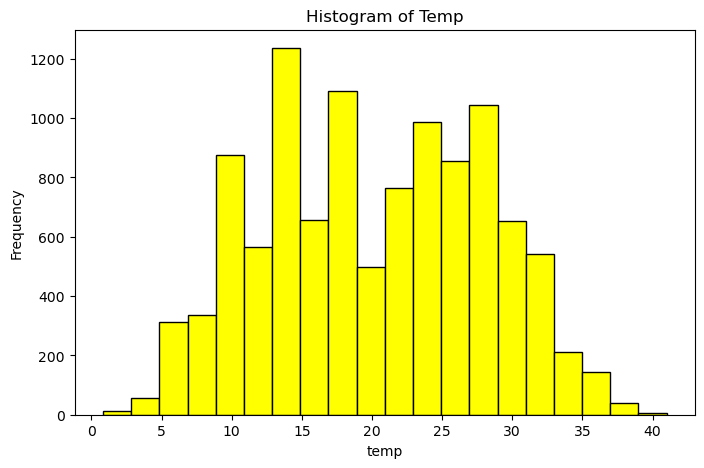

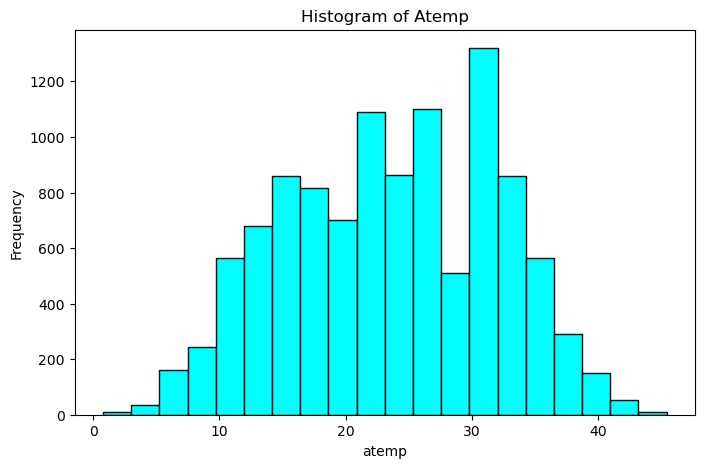

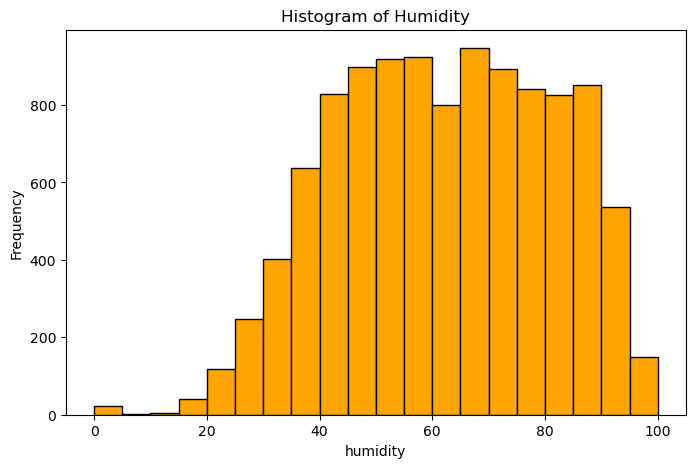

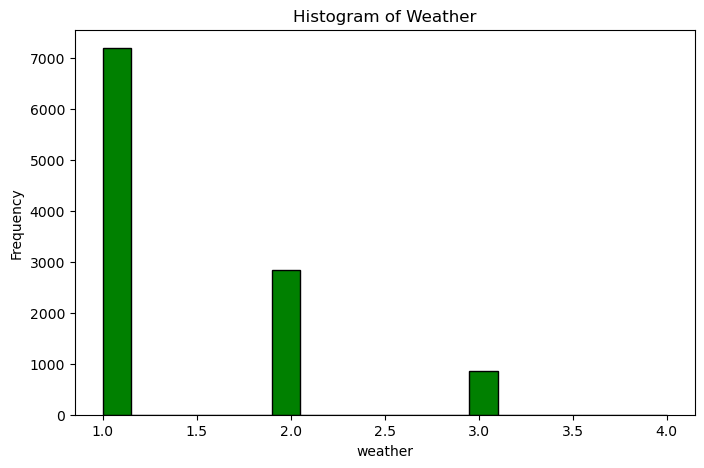

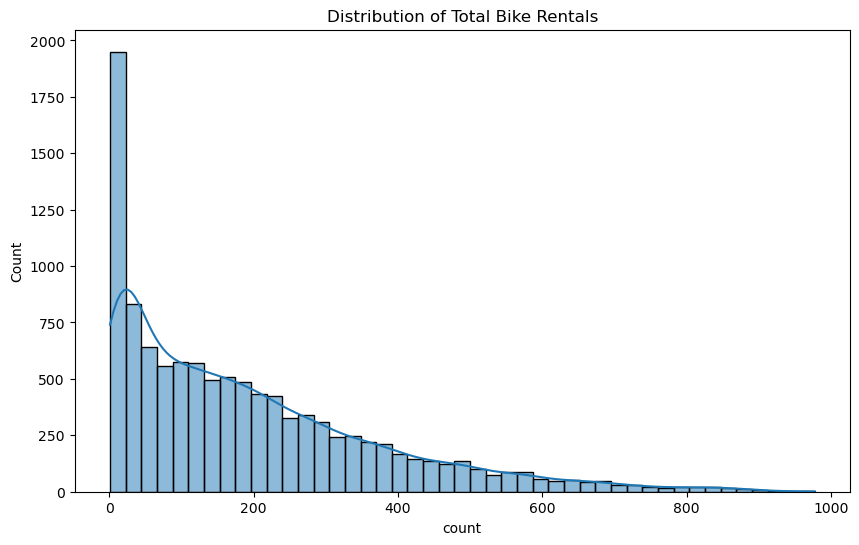

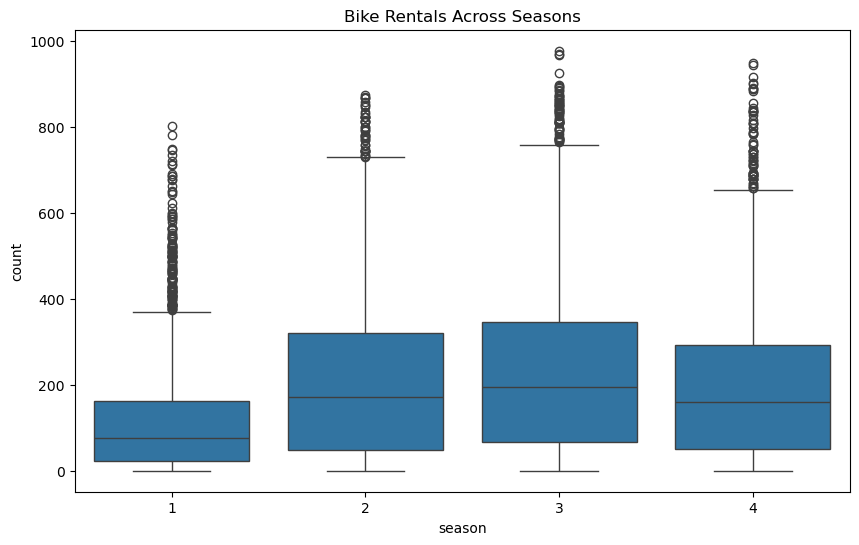

In [83]:
num_features = ['temp', 'atemp', 'humidity', 'weather']
colors = ['yellow', 'cyan', 'orange', 'green']

for feature, color in zip(num_features, colors):
    plt.figure(figsize=(8,5))
    plt.hist(train_set[feature], bins=20, color=color, edgecolor='black')
    plt.title(f'Histogram of {feature.capitalize()}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Temp - Most temperatures are between 10C - 30C with a peak around 15C - 20C. Distribution seems to be skewed slightly toward lower temperatures.
# Atemp (feels-like temp) - Follows a similar pattern to actual temp peaking around 25C – 30C. Slightly more centered compared to real temperature.
# Humidity - Mostly high humidity around 40% - 90%, and a normal distribution. Very few days have humidity under 20%.
# Weather - Majority of days have clear/mostly clear weather (ex: category 1). Very few days have bad weather (like categories 3 and 4).



plt.figure(figsize=(10,6))
sns.histplot(train_set['count'], kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.show()

# Most rental days have a low num of bikes rented (~200). Highly right-skewed and high rental counts are rare.



plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='count', data=train_set)
plt.title('Bike Rentals Across Seasons')
plt.show()

# Median bike rentals are similar in all seasons, but number of outliers (high rental days) are pretty large. 
# Season 3 (Summer) slightly edges out others for higher rentals.

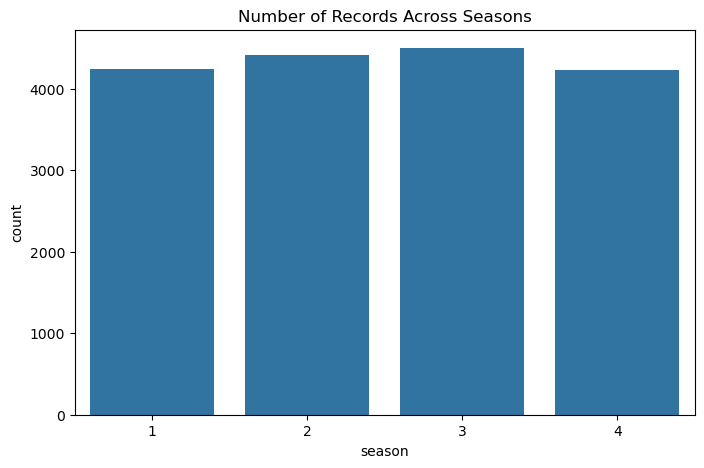

In [97]:
# Season Count
plt.figure(figsize=(8,5))
sns.countplot(x='season', data=data)
plt.title('Number of Records Across Seasons')
plt.show()

# Data is almost evenly spread out across all four seasons with very slight differences. 
# This means the dataset is mostly balanced seasonally — no major bias toward any specific season - proves hypothesis wrong.

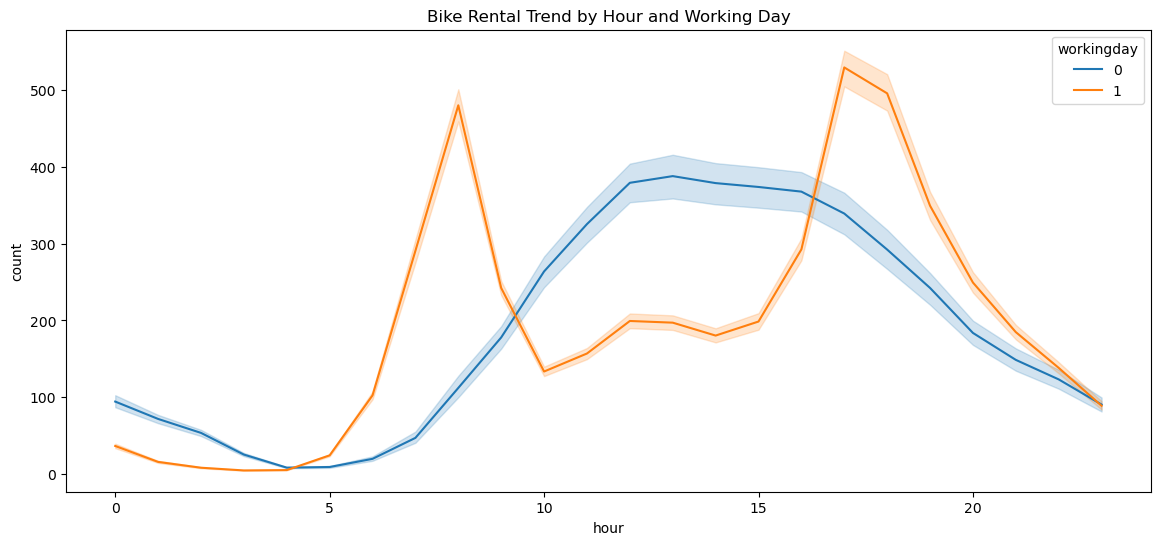

In [99]:
# Hourly and Workingday Trend
train_set['hour'] = pd.to_datetime(train_set['datetime']).dt.hour
plt.figure(figsize=(14,6))
sns.lineplot(data=train_set, x='hour', y='count', hue='workingday')
plt.title('Bike Rental Trend by Hour and Working Day')
plt.show()

# On working days (1), rentals peak around 8 AM and 5-6 PM - mostly due to commuting hours.
# On non-working days (0), rentals are more spread out increasing around 2-4 PM - afternoon leisure times.

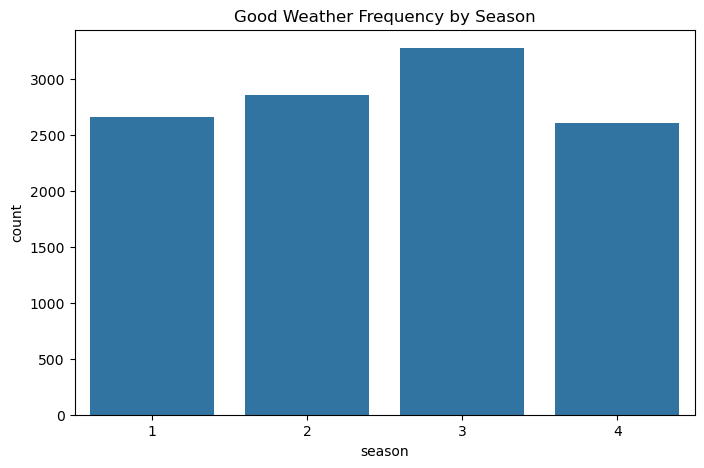

In [71]:
# Good Weather Frequency by Season
good_weather = data[data['weather'] == 1]
plt.figure(figsize=(8,5))
sns.countplot(x='season', data=good_weather)
plt.title('Good Weather Frequency by Season')
plt.show()

In [73]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train_set.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '2011-01-01 00:00:00'

<Figure size 1200x800 with 0 Axes>